<a href="https://colab.research.google.com/github/Irakoze-A/ML-Basics-notebooks/blob/main/Face_Completion%20with%20multi_output_regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [17]:
print('data shape ',data.shape)
print(data[1])

data shape  (400, 4096)
[0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]


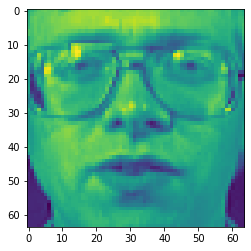

In [15]:
from matplotlib import pyplot as plt

img = data[19].reshape(64,64)
plt.imshow(img)

In [22]:
n_pixels = data.shape[1]
train = data[targets < 30]
test = data[targets >30]

In [43]:
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

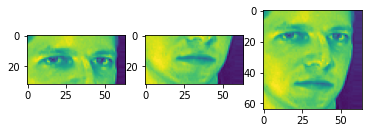

In [44]:
ax,ax2, ax3= plt.subplot(1,3,1), plt.subplot(1,3,2),plt.subplot(1,3,3)
ax.imshow(X_train[1].reshape(32,64))
ax2.imshow(y_train[1].reshape(32,64))
ax3.imshow(train[1].reshape(64,64))

In [33]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [52]:
y_pred = knn.predict(X_test)

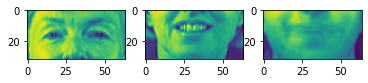

In [36]:
ax,ax2, ax3= plt.subplot(1,3,1), plt.subplot(1,3,2),plt.subplot(1,3,3)
ax.imshow(X_test[1].reshape(32,64))
ax2.imshow(y_test[1].reshape(32,64))
ax3.imshow(y_pred[1].reshape(32,64))

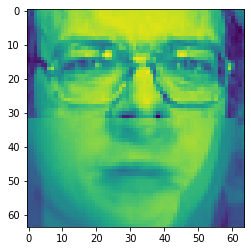

In [54]:
y_test = np.hstack((X_test,y_pred))
plt.imshow(y_test[56].reshape(64,64))

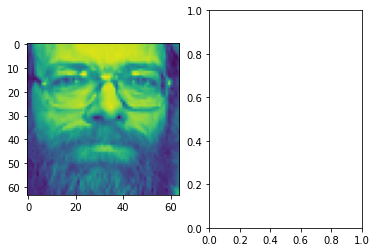

In [55]:
ax1,ax2 = plt.subplot(1,2,1),plt.subplot(1,2,2)
ax1.imshow(y_test[56].reshape(64,64))
ax1.imshow(test[56].reshape(64,64))